# **1 Handwritten Digit Recognition (MNIST)**

This project demonstrates classification of handwritten digits (0–9) using the MNIST dataset. Each image is a 28x28 grayscale digit. We will go through data preprocessing, model building, and evaluation to train a classifier that can accurately recognize digits from handwritten images.

In [4]:
#importing necessary libaries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### **1.1 Dataset Overview**

Let's load the data and check its basic structure

In [5]:
# Load MNIST dataset into training and test sets (images and labels).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# Create a data directory and save MNIST arrays in compressed formatfrom pathlib import Path
from pathlib import Path
data_dir = Path.cwd().parent / "data"
data_dir.mkdir(parents=True, exist_ok=True)   

np.savez_compressed(
    data_dir / "mnist_data.npz",
    x_train=x_train, y_train=y_train,
    x_test=x_test, y_test=y_test
)

In [10]:
# Load MNIST data arrays from the compressed file
data_path = Path.cwd().parent / "data" / "mnist_data.npz"
data = np.load(data_path)
x_train, y_train = data["x_train"], data["y_train"]
x_test, y_test = data["x_test"], data["y_test"]

In [11]:
# Display shapes of train/test sets and first 10 training labels
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)
print("First 10 labels:", y_train[:10])


Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)
First 10 labels: [5 0 4 1 9 2 1 3 1 4]


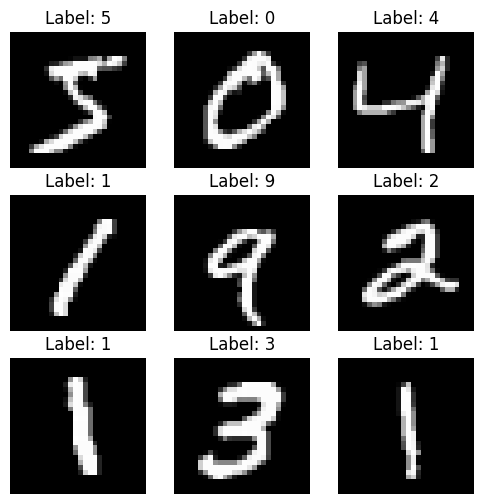

In [12]:
# Visualize the first 9 images in the training set with their labels
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')
plt.show()


### **1.2 Data Preprocessing: Normalization and Reshaping**

In [13]:
# Normalize pixel values to [0,1] and show range after scaling
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Pixel value range after normalization:", x_train.min(), "to", x_train.max())


Pixel value range after normalization: 0.0 to 1.0


In [14]:
# Reshape images from 28x28 to 1D vectors and display new shapes
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

print("x_train shape after reshape:", x_train.shape)
print("x_test shape after reshape:", x_test.shape)


x_train shape after reshape: (60000, 784)
x_test shape after reshape: (10000, 784)


### **1.3 Model Training**

In [15]:
# Import Keras modules for building a neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [16]:
# Build a neural network with two hidden layers and softmax output
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  
    Dense(64, activation='relu'),                      
    Dense(10, activation='softmax')                     
])

c:\Users\lizzy\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
# Train the model for 5 epochs with validation on the test set
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9287 - loss: 0.2445 - val_accuracy: 0.9619 - val_loss: 0.1242
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9676 - loss: 0.1038 - val_accuracy: 0.9726 - val_loss: 0.0882
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0701 - val_accuracy: 0.9711 - val_loss: 0.0936
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0544 - val_accuracy: 0.9754 - val_loss: 0.0885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0449 - val_accuracy: 0.9757 - val_loss: 0.0828


### **1.4 Model Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0828
Test accuracy: 0.9757000207901001


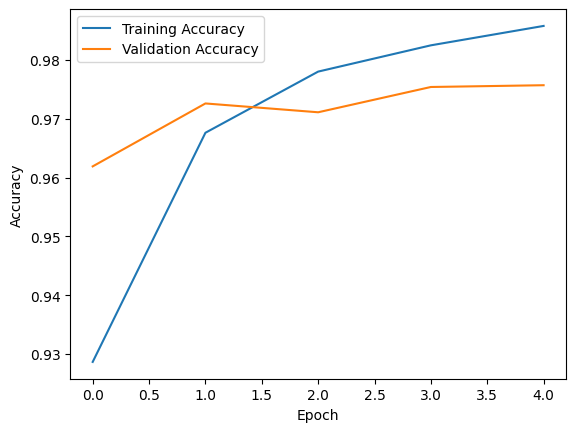

In [19]:
# Evaluate the model on the test set and plot training/validation accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


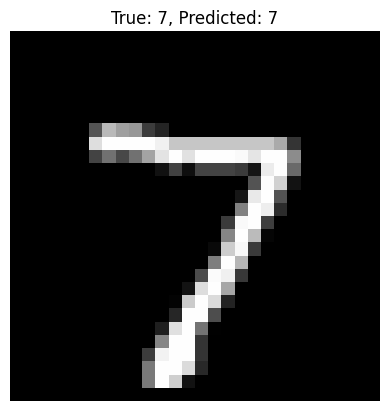

In [20]:
# Make a prediction on a single test image and display the result

img = x_test[0]        # first image
label = y_test[0]      # true label

# Predict
prediction = model.predict(img.reshape(1, 784))  # reshape to (1, 784) for single image
predicted_label = np.argmax(prediction)          # index of highest probability

# Show results
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"True: {label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [21]:
num_images = 9

images = x_test[:num_images]
true_labels = y_test[:num_images]

# Predict all at once (more efficient)
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


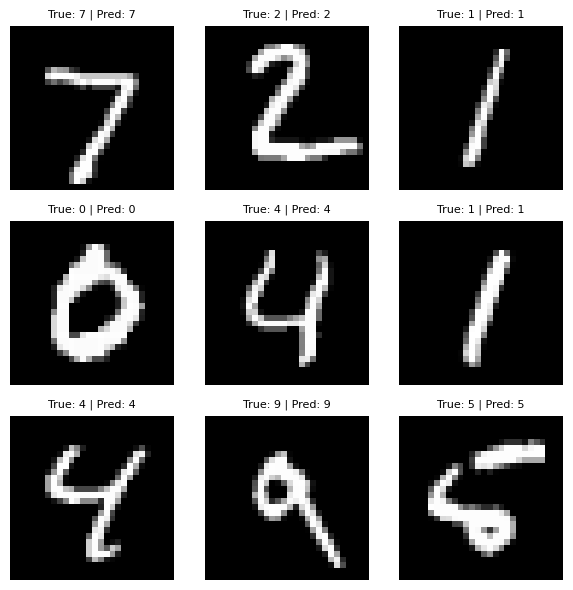

In [23]:
plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {predicted_labels[i]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.savefig("digit_grid.png", dpi=150)  # saves directly
plt.show()


### **1.5 Saving Model Predictions**

In [ ]:
# Save all predicted labels for the test set to a .npy file
import numpy as np
import os

# Make predictions on the whole test set
predictions = model.predict(x_test)

# Convert probabilities → labels (0–9)
predicted_labels = np.argmax(predictions, axis=1)

# Save into scripts folder
save_path = os.path.join("..", "scripts", "predicted_labels.npy")
np.save(save_path, predicted_labels)

print(f"Predictions saved at {save_path}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions saved at ..\scripts\predicted_labels.npy
